(300,)


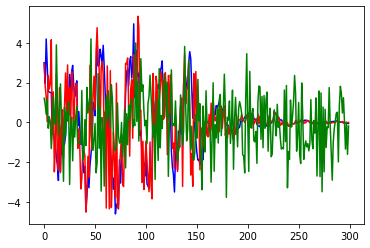

In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats


points = 300

sigma = 0.5 # mean and standard deviation
a = np.random.normal(1, sigma, points)
b = np.random.normal(3, sigma, points)

c_1 = np.ones(points//2)
c_2= np.array([1/np.sqrt(max(t,1)) for t in range(points//4)])
c_3= np.array([1/(t+4) for t in range(points//4)])

c = np.append(c_1, c_2)
c = np.append(c, c_3)

err = np.random.normal(0, sigma, points)
err2 = np.random.normal(0, sigma, points)
err3 = np.random.normal(0, sigma, points)




t = np.array(range(points))

frec1 = 5
frec2 =7

lag = 10


x1 = c*(a * np.sin(2*np.pi * (t/200) * frec1) + b * np.cos(2*np.pi * (t/200) * frec2) + err)

x2 = c*(a * np.sin(2*np.pi * ((t-lag*err2)/200) * frec1) + b * np.cos(2*np.pi * ((t-lag*err2)/200) * frec2) + err)

x3 = 3*err3

import matplotlib.pyplot as plt

print(x1.shape)

plt.plot(t,x1, color='b')
plt.plot(t,x2, color='r')
plt.plot(t,x3, color='g')

 

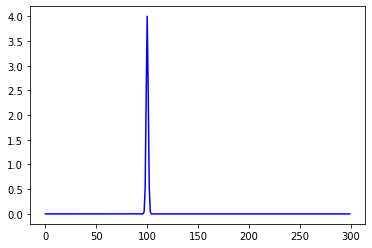

In [13]:
from scipy.stats import norm

def get_anomalous_array(index, value, window, sd, num_values):
    
    base = np.zeros(num_values)
    result = base
    
    for k in range(index - window, index + window):
        if k< num_values:
            result[k] = value * norm.pdf((k-index)/sd)/norm.pdf(0)   
    return np.array(result)

result = get_anomalous_array(100, 4, 40, 1,points)

plt.plot(t,result, color='b')

    
    
    


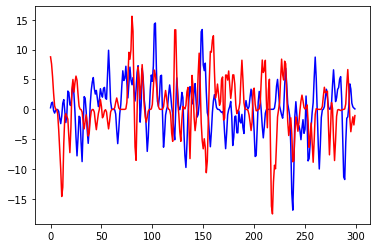

In [14]:
from random import uniform


index_num = 100
max_perturbation = 10

def generate_random_indexes():
    anomalous_indexes = []
    for i in range(index_num):
        ran = int(uniform(0, points))
        while ran in anomalous_indexes:
            ran = int(uniform(0, points))
        anomalous_indexes.append(ran)
    anomalous_indexes.sort()
    return anomalous_indexes
    
    
    

anomalous_indexes_1 = generate_random_indexes()
#anomalous_indexes_1 = [10, 30, 40, 50, 72, 85, 99, 102, 104, 210, 270]
anomalous_values_1 = [uniform(-max_perturbation, max_perturbation) for i in range(len(anomalous_indexes_1))] #[8, 2, 7,-8, 5, -5, 8, -3, 5, -5, 6]

anomalous_indexes_2 = generate_random_indexes()
#anomalous_indexes_2 = [1, 53, 64, 70, 93, 100,111, 122, 134, 150, 220]
anomalous_values_2 = [uniform(-max_perturbation, max_perturbation) for i in range(len(anomalous_indexes_2))] #[8, 2, 7,-8, 5, -5, 8, -3, 5, -5, 6]

perturbation_array_1 = np.zeros(points)
perturbation_array_2 = np.zeros(points)

window = 50

for i in range(len(anomalous_indexes_1)):
    perturbation_array_1 = perturbation_array_1 + get_anomalous_array(anomalous_indexes_1[i], anomalous_values_1[i], window, 1,points)
    perturbation_array_2 = perturbation_array_2 + get_anomalous_array(anomalous_indexes_2[i], anomalous_values_2[i], window, 1,points)




plt.plot(t,perturbation_array_1, color='b')
plt.plot(t,perturbation_array_2, color='r')


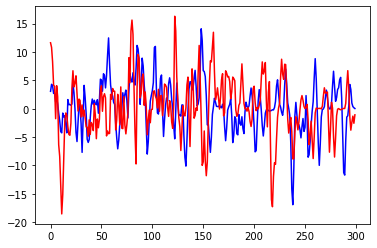

In [15]:

i1 = np.ones(points)
i2 = np.ones(points)
for i in range(len(anomalous_indexes_1)):
    i1[anomalous_indexes_1[i]] = anomalous_values_1[i]
    i2[anomalous_indexes_2[i]] = anomalous_values_2[i]
    

x1_perturbed = x1 + perturbation_array_1
x2_perturbed = x2 + perturbation_array_2


plt.plot(t,x1_perturbed, color='b')
plt.plot(t,x2_perturbed, color='r')

MAE: -1.781
Config: {'alpha': 0.5}
[1 1 0]
MAE: -2.466
Config: {'alpha': 0.5}
[1 1 0]
MAE: -1.150
Config: {'alpha': 1.0800000000000005}
[0 0 1]


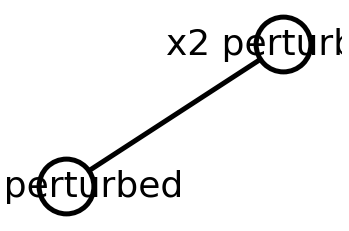

In [37]:
from GraphicalGranger import GraphicalGranger

gr = GraphicalGranger(0.5)
  
connections = gr.graphical_relations_matrix([x1_perturbed, x2_perturbed, x3], 5, use_model = "lasso")
connections

gr.draw_graph(connections, time_series_labels = ["x1 perturbed","x2 perturbed", "x3"])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.8069  , p=0.0171  , df_denom=284, df_num=5
ssr based chi2 test:   chi2=14.5779 , p=0.0123  , df=5
likelihood ratio test: chi2=14.2292 , p=0.0142  , df=5
parameter F test:         F=2.8069  , p=0.0171  , df_denom=284, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=2.0887  , p=0.0669  , df_denom=284, df_num=5
ssr based chi2 test:   chi2=10.8482 , p=0.0545  , df=5
likelihood ratio test: chi2=10.6535 , p=0.0587  , df=5
parameter F test:         F=2.0887  , p=0.0669  , df_denom=284, df_num=5
[1 1 0]

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=8.1893  , p=0.0000  , df_denom=284, df_num=5
ssr based chi2 test:   chi2=42.5324 , p=0.0000  , df=5
likelihood ratio test: chi2=39.7325 , p=0.0000  , df=5
parameter F test:         F=8.1893  , p=0.0000  , df_denom=284, df_num=5

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.4226  , p=

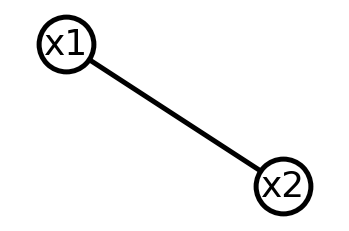

In [40]:
from GraphicalGranger import GraphicalGranger

gr = GraphicalGranger(0.5)
  
connections = gr.graphical_relations_matrix([x1, x2, x3], 5, use_model = "classical")
connections

gr.draw_graph(connections, time_series_labels = ["x1","x2", "x3"])